<a href="https://colab.research.google.com/github/vidyasri03/Machine-Learning/blob/main/lab_2_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

def extract_matrix(dataframe, columns):
    #Extracts a matrix from specific columns of dataset.
    return dataframe.iloc[:, columns].to_numpy()

def calculate_pseudo_inverse(matrix):
    #Calculates the pseudo-inverse of a matrix
    return np.linalg.pinv(matrix)

# Function to predict costs using the pseudo-inverse
def predict_costs(pseudo_inverse_matrix, costs):
    #Predicts costs using the pseudo-inverse matrix and cost vector
    return np.dot(pseudo_inverse_matrix, costs)

# Function to classify costs
def classify_costs(costs):
    #Classifies costs as 1-rich or 0-poor based on a threshold
    return [1 if i >= 200 else 0 for i in costs]

def main():
    # Mount Google Drive
    drive.mount('/content/drive')
    purchase_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx', usecols=[0,1, 2, 3,4])

    # Prints purchase data
    print("PURCHASE DATA:")
    print(purchase_data)

    # Extracts matrices A and C. A is quantity of 4 products purchased by customers and C is payment of each customer
    A = extract_matrix(purchase_data, range(1, 4))
    C = extract_matrix(purchase_data, [4])

    # Prints matrices A and C
    print("MATRIX A:")
    print(A)
    print("MATRIX C:")
    print(C)

    # Prints dimensionality and number of vector spaces
    print("DIMENSIONALITY OF VECTOR SPACE OF DATA:\n", len(A[0]))
    print("NO. OF VECTOR SPACES:\n", len(A))

    # Calculates rank of matrix A
    rank_A = np.linalg.matrix_rank(A)
    print("RANK OF MATRIX A:\n", rank_A)

    # Calculates pseudo-inverse of matrix A
    pseudo_inverse_A = calculate_pseudo_inverse(A)
    print("PSEUDO INVERSE OF A:\n", pseudo_inverse_A)

    # Predicts costs
    cost = predict_costs(pseudo_inverse_A, C)
    print("PREDICTED COSTS:\n", cost)

    # Classifies costs and predicts new X matrix
    C_new = classify_costs(C.flatten())
    X_new = np.dot(pseudo_inverse_A, C_new)
    print("NEW X MATRIX:")
    print(X_new)

    #Evaluates matrix A with new X and print classification
    for i in range(len(A)):
        val = np.dot(A[i], X_new)
        if round(val) == 1:
            print("RICH")
        elif round(val) == 0:
            print("POOR")
        else:
            print("NONE")

if __name__ == "__main__":
    main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
PURCHASE DATA:
  Customer  Candies  Mangoes  Milk Packets  Payment
0      C_1       20        6             2      386
1      C_2       16        3             6      289
2      C_3       27        6             2      393
3      C_4       19        1             2      110
4      C_5       24        4             2      280
5      C_6       22        1             5      167
6      C_7       15        4             2      271
7      C_8       18        4             2      274
8      C_9       21        1             4      148
9     C_10       16        2             4      198
MATRIX A:
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
MATRIX C:
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
DIMENSIONALITY OF VECTOR SPACE OF DATA:
 3
NO. OF VECTOR SPACES:
 10
RAN

Mounted at /content/drive
MEAN OF PRICES:
 1560.663453815261
VARIANCE OF PRICES:
 58732.365352539186
SAMPLE MEAN OF WEDNESDAY:
 1550.706
SAMPLE MEAN OF APRIL:
 1698.9526315789474
PROBABILITY OF MAKING LOSS:
 0.4979919678714859
PROBABILITY OF MAKING PROFIT ON WEDNESDAY:
 2.48
CONDITIONAL PROBABILITY OF MAKING PROFIT GIVEN IT'S WEDNESDAY:
 0.4979919678714859


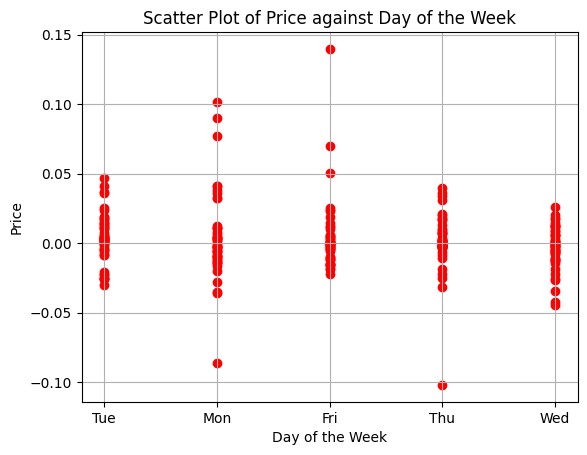

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Mount Google Drive
drive.mount('/content/drive')

# Function to calculate the mean of a list of prices
def MEAN(prices):
    return statistics.mean(prices)

# Function to calculate the variance of a list of prices
def VARIANCE(prices):
    return statistics.variance(prices)

def PROBABILITY(outcomes, total):
    # Return the probability as a fraction of outcomes over total
    return outcomes / total

# Read data from the Excel file
IRCTC = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx', sheet_name="IRCTC Stock Price")

# Extracts prices column
prices = IRCTC["Price"]

# Calculates and print the mean of prices
print("MEAN OF PRICES:\n", MEAN(prices))

# Calculates and prints the variance of prices
print("VARIANCE OF PRICES:\n", VARIANCE(prices))

# Extracts Wednesday prices and calculates the sample mean
wednesday_prices = IRCTC[IRCTC['Day'] == "Wed"]["Price"]
print("SAMPLE MEAN OF WEDNESDAY:\n", MEAN(wednesday_prices))

# Extracts April data and calculates the sample mean for April
april_data = IRCTC[IRCTC['Month'] == "Apr"]["Price"]
print("SAMPLE MEAN OF APRIL:\n", MEAN(april_data))

# Calculates the probability of making a loss (Chg% < 0)
loss = len(IRCTC[IRCTC["Chg%"] < 0])
print("PROBABILITY OF MAKING LOSS:\n", PROBABILITY(loss, len(IRCTC)))

# Calculates the probability of making a profit on Wednesday (Chg% > 0 on Wednesday)
wed_profit = len(IRCTC[IRCTC["Chg%"] > 0])
print("PROBABILITY OF MAKING PROFIT ON WEDNESDAY:\n", PROBABILITY(wed_profit, len(IRCTC[IRCTC["Day"] == "Wed"])))

# Calculates and prints conditional probability of making profit given it's Wednesday
print("CONDITIONAL PROBABILITY OF MAKING PROFIT GIVEN IT'S WEDNESDAY:\n", PROBABILITY(wed_profit, len(IRCTC)))

# Plots a scatter plot of Day vs Chg%
plt.scatter(IRCTC['Day'], IRCTC['Chg%'], color="red")
plt.grid(True)
plt.xlabel('Day of the Week')
plt.ylabel('Price')
plt.title('Scatter Plot of Price against Day of the Week')
plt.show()


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy.linalg import norm

# Function to display data types and their attributes
def display_data_types(data_types):
    for dtype, attributes in data_types.items():
        print(f"\n{dtype}:")
        for attribute in attributes:
            print(f"{attribute}")

# Function to encode nominal and ordinal attributes
def encode_attributes(df, data_types):
    nominal_attributes = data_types.get('NOMINAL', [])
    ordinal_attributes = data_types.get('ORDINAL', [])

    # Label encode ordinal attributes
    label_encoders = {col: LabelEncoder().fit(df[col]) for col in ordinal_attributes}
    for col, le in label_encoders.items():
        df[col] = le.transform(df[col])

    # One-hot encode nominal attributes
    df = pd.get_dummies(df, columns=nominal_attributes, drop_first=True)

    # Converts boolean columns to integers
    boolean_cols = df.select_dtypes(include=[bool]).columns
    df[boolean_cols] = df[boolean_cols].astype(int)

    return df

# Function to calculate and display range for numerical columns
def calculate_ranges(df, columns):
    numerical = df[columns]
    min_values = numerical.min(skipna=True)
    max_values = numerical.max(skipna=True)
    ranges = max_values - min_values
    print("\nRANGES:")
    print(ranges)
    return ranges

# Function to handle missing values using mean or median
def handle_missing_values(df, columns, outliers_dict):
    for col in columns:
        numerical_attr = df[col]
        mean = numerical_attr.mean()
        median = numerical_attr.median()
        if outliers_dict[col].any():
            df[col].fillna(median, inplace=True)
        else:
            df[col].fillna(mean, inplace=True)
    return df

# Function to detect outliers using IQR
def detect_outliers(df, columns):
    outliers_dict = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outliers_dict[col] = outliers
        print("\nOUTLIERS FOR", col, ":")
        print(df[col][outliers])
    return outliers_dict

# Function to normalize numerical data using MinMaxScaler
def normalize_data(df, columns):
    scaler = MinMaxScaler()
    df[columns] = pd.DataFrame(scaler.fit_transform(df[columns]), columns=columns)
    return df

# Function to calculate similarity metrics - Jaccard, Simple Matching, Cosine Similarity
def calculate_similarity(df):
    vector_1 = df.iloc[0]
    vector_2 = df.iloc[1]

    # Jaccard and Simple Matching Coefficients
    f11 = sum((vector_1 == 1) & (vector_2 == 1))
    f10 = sum((vector_1 == 1) & (vector_2 == 0))
    f01 = sum((vector_1 == 0) & (vector_2 == 1))
    f00 = sum((vector_1 == 0) & (vector_2 == 0))

    jc = f11 / (f11 + f10 + f01)
    smc = (f11 + f00) / (f11 + f10 + f01 + f00)
    print("Jaccard Coefficient:", jc)
    print("Simple Matching Coefficient:", smc)

    # Cosine Similarity
    vector1 = df.iloc[0].values
    vector2 = df.iloc[1].values

    dot_product = np.dot(vector1, vector2)
    magnitude_vector1 = norm(vector1)
    magnitude_vector2 = norm(vector2)

    cosine_similarity = dot_product / (magnitude_vector1 * magnitude_vector2)
    print(f"Cosine Similarity: {cosine_similarity}")


def main():
    drive.mount('/content/drive')
    thyroid = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lab Session Data.xlsx',sheet_name="thyroid0387_UCI")

    # Defines data types
    nominal = ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured', 'referral source', 'Condition']
    ordinal = []  # No ordinal attributes
    discrete = ['age']  # Discrete variables
    continuous = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']  # Continuous variables

    # Organizes data types into a dictionary
    data_types = {'NOMINAL': nominal, 'ORDINAL': ordinal, 'DISCRETE': discrete, 'CONTINUOUS': continuous}

    # Displays data types
    display_data_types(data_types)

    # Encodes nominal and ordinal attributes
    thyroid = encode_attributes(thyroid, data_types)
    print("DATA AFTER ENCODING:")
    print(thyroid.head())

    # Replaces "?" with NaN
    thyroid.replace("?", np.nan, inplace=True)

    # Detects outliers and calculate ranges for numerical attributes
    columns = data_types['DISCRETE'] + data_types['CONTINUOUS']
    outliers_dict = detect_outliers(thyroid, columns)
    ranges = calculate_ranges(thyroid, columns)

    # Handles missing values based on outlier presence
    thyroid = handle_missing_values(thyroid, columns, outliers_dict)

    # Normalizes numerical data
    thyroid = normalize_data(thyroid, columns)
    print("FINAL DATA AFTER NORMALIZATION:")
    print(thyroid.head())

    # Calculates similarity metrics between two records
    calculate_similarity(thyroid)
if __name__ == "__main__":
   main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

NOMINAL:
sex
on thyroxine
query on thyroxine
on antithyroid medication
sick
pregnant
thyroid surgery
I131 treatment
query hypothyroid
query hyperthyroid
lithium
goitre
tumor
hypopituitary
psych
TSH measured
T3 measured
TT4 measured
T4U measured
FTI measured
TBG measured
referral source
Condition

ORDINAL:

DISCRETE:
age

CONTINUOUS:
TSH
T3
TT4
T4U
FTI
TBG
DATA AFTER ENCODING:
   Record ID  age  TSH   T3  TT4 T4U FTI TBG  sex_F  sex_M  ...  Condition_MI  \
0  840801013   29  0.3    ?    ?   ?   ?   ?      1      0  ...             0   
1  840801014   29  1.6  1.9  128   ?   ?   ?      1      0  ...             0   
2  840801042   41    ?    ?    ?   ?   ?  11      1      0  ...             0   
3  840803046   36    ?    ?    ?   ?   ?  26      1      0  ...             0   
4  840803047   32    ?    ?    ?   ?   ?  36      1      0  ...             0   

   C

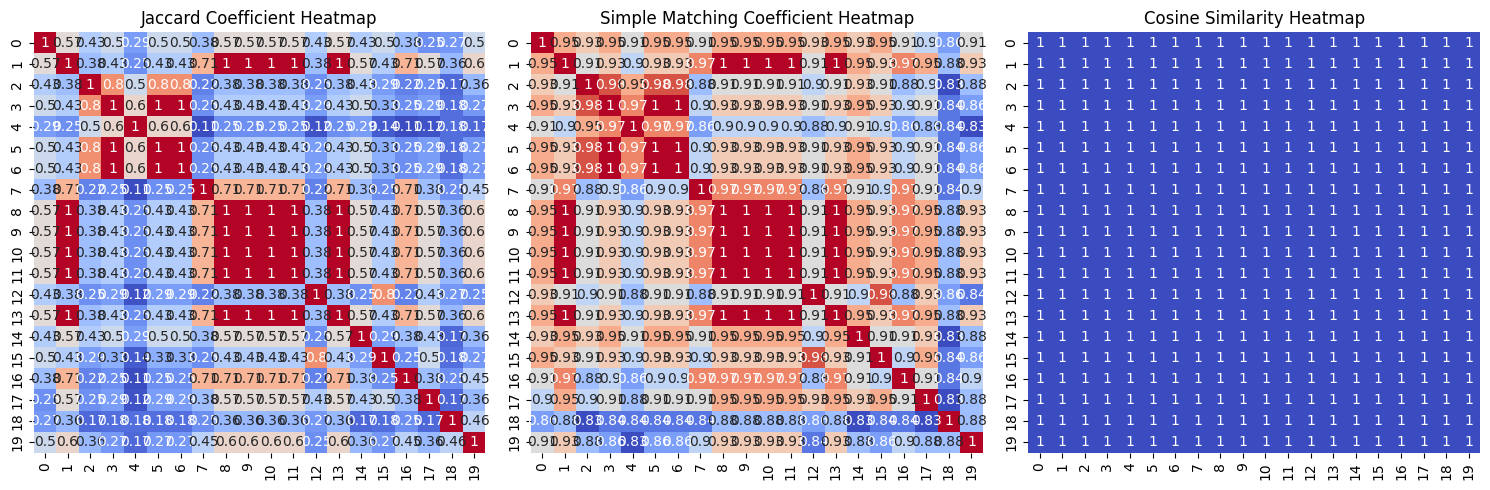

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to calculate Jaccard Coefficient, Simple Matching Coefficient, and Cosine Similarity for a first 20 values
def calculate_similarity_matrices(thyroid_subset):
    n = len(thyroid_subset)

    jc_matrix = np.zeros((n, n))  # Jaccard Coefficient matrix
    smc_matrix = np.zeros((n, n))  # Simple Matching Coefficient matrix
    cosine_matrix = np.zeros((n, n))  # Cosine Similarity matrix

    # Calculates similarity metrics for all pairs of records
    for i in range(n):
        for j in range(n):
            vec1 = thyroid_subset.iloc[i]
            vec2 = thyroid_subset.iloc[j]

            # Calculates counts for Jaccard and SMC
            f11 = sum((vec1 == 1) & (vec2 == 1))
            f10 = sum((vec1 == 1) & (vec2 == 0))
            f01 = sum((vec1 == 0) & (vec2 == 1))
            f00 = sum((vec1 == 0) & (vec2 == 0))

            # Calculates Jaccard Coefficient
            jc_matrix[i, j] = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) > 0 else 0

            # Calculates Simple Matching Coefficient
            smc_matrix[i, j] = (f11 + f00) / (f11 + f10 + f01 + f00)

            # Calculates Cosine Similarity
            cosine_matrix[i, j] = cosine_similarity([vec1], [vec2])[0][0]

    return jc_matrix, smc_matrix, cosine_matrix

# Function to plot heatmaps for Jaccard, SMC, and Cosine Similarity matrices
def plot_similarity_heatmaps(jc_matrix, smc_matrix, cosine_matrix):
    plt.figure(figsize=(15, 5))

    # Jaccard Coefficient Heatmap
    plt.subplot(1, 3, 1)
    sns.heatmap(jc_matrix, annot=True, cmap='coolwarm', cbar=False)
    plt.title('Jaccard Coefficient Heatmap')

    # Simple Matching Coefficient Heatmap
    plt.subplot(1, 3, 2)
    sns.heatmap(smc_matrix, annot=True, cmap='coolwarm', cbar=False)
    plt.title('Simple Matching Coefficient Heatmap')

    # Cosine Similarity Heatmap
    plt.subplot(1, 3, 3)
    sns.heatmap(cosine_matrix, annot=True, cmap='coolwarm', cbar=False)
    plt.title('Cosine Similarity Heatmap')

    # Adjusts layout to prevent overlapping titles and labels
    plt.tight_layout()

    # Display the heatmaps
    plt.show()

# Main function to calculate similarity matrices and plot heatmaps for the first 20 rows of the dataset
def main():
    thyroid_20 = thyroid.iloc[:20]  # Select the first 20 rows of the dataset

    # Calculates similarity matrices
    jc_matrix, smc_matrix, cosine_matrix = calculate_similarity_matrices(thyroid_20)

    # Plots the heatmaps
    plot_similarity_heatmaps(jc_matrix, smc_matrix, cosine_matrix)

if __name__ == "__main__":
   main()